In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/MyDrive/Brain_Tumor_Classification/Training"
test_dir  = "/content/drive/MyDrive/Brain_Tumor_Classification/Testing"

In [ ]:
import os

print("Training exists:", os.path.exists(train_dir))
print("Testing exists:", os.path.exists(test_dir))

print("Training folders:", os.listdir(train_dir))
print("Testing folders:", os.listdir(test_dir))

Training exists: True
Testing exists: True
Training folders: ['meningioma_tumor', 'glioma_tumor', 'pituitary_tumor', 'no_tumor']
Testing folders: ['meningioma_tumor', 'glioma_tumor', 'pituitary_tumor', 'no_tumor']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_gen,
    epochs=15,
    validation_data=test_gen
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 849s 9s/step - accuracy: 0.4219 - loss: 1.4218 - val_accuracy: 0.4112 - val_loss: 1.4653
Epoch 2/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 45s 497ms/step - accuracy: 0.5704 - loss: 0.9766 - val_accuracy: 0.4112 - val_loss: 2.3363
Epoch 3/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 46s 506ms/step - accuracy: 0.6573 - loss: 0.7820 - val_accuracy: 0.4594 - val_loss: 2.1023
Epoch 4/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 44s 494ms/step - accuracy: 0.7027 - loss: 0.6961 - val_accuracy: 0.4518 - val_loss: 1.9729
Epoch 5/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 45s 495ms/step - accuracy: 0.7319 - loss: 0.6411 - val_accuracy: 0.4467 - val_loss: 2.4077
Epoch 6/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 46s 507ms/step - accuracy: 0.7620 - loss: 0.5546 - val_accuracy: 0.4543 - val_loss: 2.8199
Epoch 7/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 44s 493ms/step - accuracy: 0.7781 - loss: 0.5445 - val_accuracy: 0.4949 - val_loss: 3.0937
Epoch 8/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 45s 499ms/step - accuracy: 0.7841 - loss: 0.5069 - val_accura

In [ ]:
import numpy as np

# Predict probabilities
y_prob = model.predict(test_gen)

# Predicted class labels
y_pred = np.argmax(y_prob, axis=1)

# True class labels
y_true = test_gen.classes

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step


In [ ]:
class_names = list(test_gen.class_indices.keys())
print(class_names)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


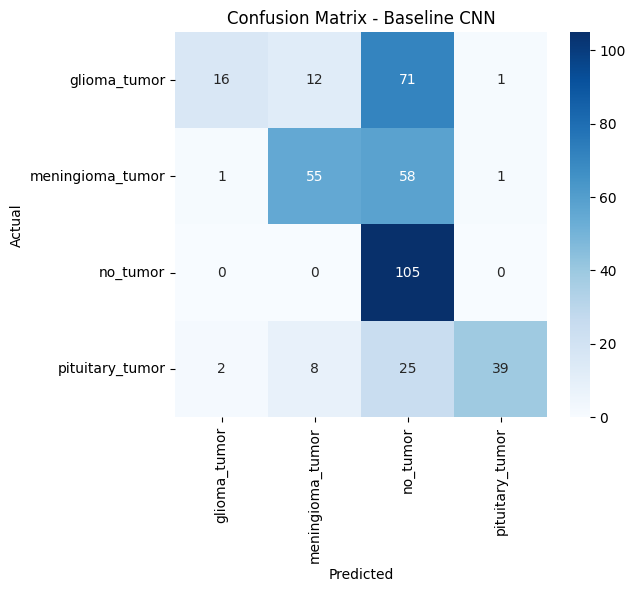

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Baseline CNN")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

                  precision    recall  f1-score   support

    glioma_tumor       0.84      0.16      0.27       100
meningioma_tumor       0.73      0.48      0.58       115
        no_tumor       0.41      1.00      0.58       105
 pituitary_tumor       0.95      0.53      0.68        74

        accuracy                           0.55       394
       macro avg       0.73      0.54      0.53       394
    weighted avg       0.71      0.55      0.52       394



In [ ]:
# index of no_tumor class
no_tumor_idx = class_names.index("no_tumor")

# 1 = tumor, 0 = no_tumor
y_true_binary = np.where(y_true == no_tumor_idx, 0, 1)
y_pred_binary = np.where(y_pred == no_tumor_idx, 0, 1)

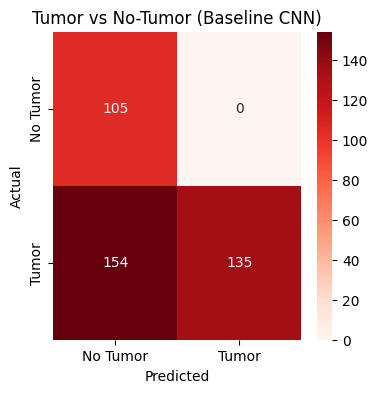

In [ ]:
from sklearn.metrics import confusion_matrix

cm_bin = confusion_matrix(y_true_binary, y_pred_binary)

plt.figure(figsize=(4,4))
sns.heatmap(cm_bin, annot=True, fmt='d',
            xticklabels=["No Tumor", "Tumor"],
            yticklabels=["No Tumor", "Tumor"],
            cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tumor vs No-Tumor (Baseline CNN)")
plt.show()

In [ ]:
print(classification_report(
    y_true_binary,
    y_pred_binary,
    target_names=["No Tumor", "Tumor"]
))

              precision    recall  f1-score   support

    No Tumor       0.41      1.00      0.58       105
       Tumor       1.00      0.47      0.64       289

    accuracy                           0.61       394
   macro avg       0.70      0.73      0.61       394
weighted avg       0.84      0.61      0.62       394



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

In [ ]:
base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

model_tl = Model(inputs=base_model.input, outputs=output)

In [ ]:
model_tl.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_tl = model_tl.fit(
    train_gen,
    epochs=10,
    validation_data=test_gen
)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 89s 777ms/step - accuracy: 0.3656 - loss: 1.4271 - val_accuracy: 0.4492 - val_loss: 1.2727
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 44s 486ms/step - accuracy: 0.6489 - loss: 0.8532 - val_accuracy: 0.5102 - val_loss: 1.2890
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 46s 510ms/step - accuracy: 0.7539 - loss: 0.6867 - val_accuracy: 0.5508 - val_loss: 1.3750
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 44s 494ms/step - accuracy: 0.7687 - loss: 0.6201 - val_accuracy: 0.5533 - val_loss: 1.3826
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 44s 493ms/step - accuracy: 0.7757 - loss: 0.5809 - val_accuracy: 0.5635 - val_loss: 1.4588
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 45s 497ms/step - accuracy: 0.8117 - loss: 0.5093 - val_accuracy: 0.5685 - val_loss: 1.4582
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 44s 490ms/step - accuracy: 0.8166 - loss: 0.4904 - val_accuracy: 0.5888 - val_loss: 1.4433
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 44s 484ms/step - accuracy: 0.8219 - loss: 0.4788 - val_accu

In [ ]:
import numpy as np

y_prob_tl = model_tl.predict(test_gen)
y_pred_tl = np.argmax(y_prob_tl, axis=1)
y_true = test_gen.classes
class_names = list(test_gen.class_indices.keys())

13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 472ms/step


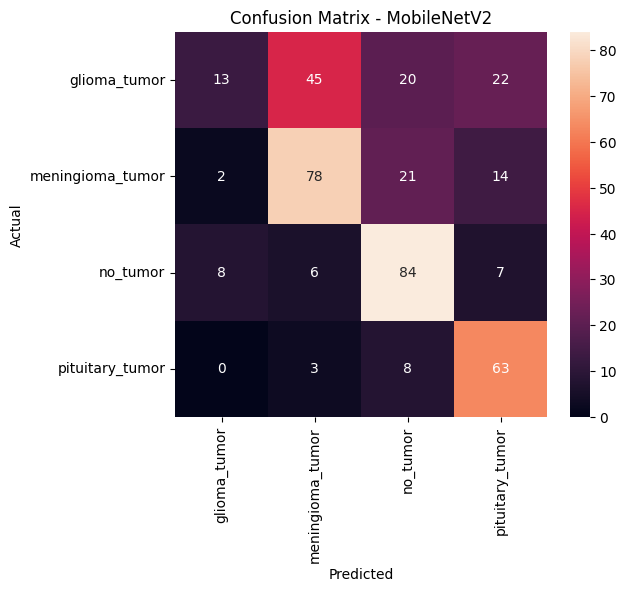

                  precision    recall  f1-score   support

    glioma_tumor       0.57      0.13      0.21       100
meningioma_tumor       0.59      0.68      0.63       115
        no_tumor       0.63      0.80      0.71       105
 pituitary_tumor       0.59      0.85      0.70        74

        accuracy                           0.60       394
       macro avg       0.60      0.61      0.56       394
    weighted avg       0.60      0.60      0.56       394



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_tl)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MobileNetV2")
plt.show()

print(classification_report(y_true, y_pred_tl, target_names=class_names))

In [ ]:
no_tumor_idx = class_names.index("no_tumor")

y_true_bin = np.where(y_true == no_tumor_idx, 0, 1)
y_pred_bin = np.where(y_pred_tl == no_tumor_idx, 0, 1)

print(classification_report(
    y_true_bin,
    y_pred_bin,
    target_names=["No Tumor", "Tumor"]
))

              precision    recall  f1-score   support

    No Tumor       0.63      0.80      0.71       105
       Tumor       0.92      0.83      0.87       289

    accuracy                           0.82       394
   macro avg       0.78      0.82      0.79       394
weighted avg       0.84      0.82      0.83       394

